In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["price"] = data.target

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr= LinearRegression()
lr.fit(df[["MedInc"]], df["price"])
y_pred = lr.predict(df[["MedInc"]])

print(f"Weights: {lr.coef_[0]:.4f}")
print(f'Bias: {lr.intercept_:.4f}')
print(f'MSE: {mean_squared_error(df["price"], y_pred):.4f}')

Weights: 0.4179
Bias: 0.4509
MSE: 0.7011


$MSE=(\hat{y}-y)$

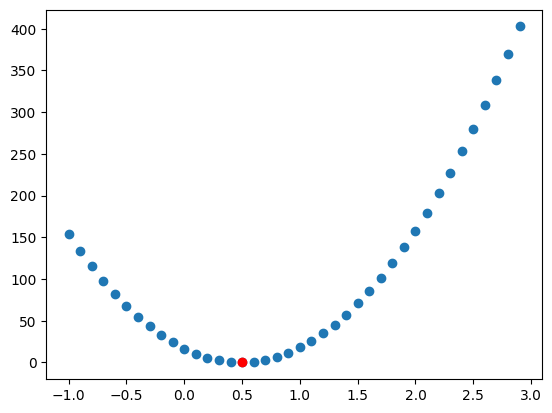

In [21]:
loss = lambda w, y: ((w* 8.3252 + 0.45) - y)**2

y = 4.526

ws = np.arange(-1, 3, .1)
losses = loss(ws, y)

plt.scatter(ws, losses)
plt.plot(0.5, loss(0.5, y), 'ro')

In [ ]:
np.random.seed(42)

w = np.random.rand(1)
b= np.random.rand(1)

f = lambda x: x*w + b

xs = np.array(df["MedInc"])
ys = np.array(df["price"])

lr = 0.1
grad = []
grad_b = []
losses = []

for i in range(5000):
    y_pred = f(xs)
    residuals = y_pred - ys

    loss = np.mean((y_pred - ys)**2)

    dw = 1/len(xs)*sum(xs*residuals)
    db = 1/len(xs)*sum(residuals)

    w -= lr*dw
    b -= lr*db
    grad.append(w)
    grad_b.append(b)
    losses.append(loss)

    if i % 500 == 0:
        print(f"iter {i}: w={w}, b={b}, loss={loss}")


iter 0: w=[0.26174429], b=[0.91752653], loss=0.8180715044418592
iter 500: w=[0.41793006], b=[0.45089586], loss=0.7011311506170517
iter 1000: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 1500: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 2000: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 2500: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 3000: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 3500: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 4000: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527
iter 4500: w=[0.41793849], b=[0.45085577], loss=0.7011311502929527


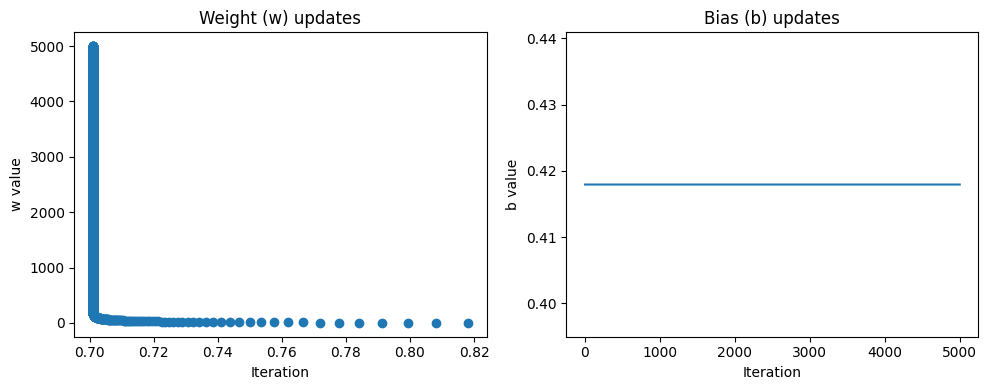

In [ ]:
plt.figure(figsize=(10,4))

# Plot W updates
plt.subplot(1,2,1)
plt.scatter(losses, list(range(len(losses))))
plt.title("Weight (w) updates")
plt.xlabel("Iteration")
plt.ylabel("w value")


# Plot B updates
plt.subplot(1,2,2)
plt.plot(grad)
plt.title("Bias (b) updates")
plt.xlabel("Iteration")
plt.ylabel("b value")

plt.tight_layout()
plt.show()

## LayerNorm
$\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}$

In [113]:
import torch
import torch.nn as nn

torch.manual_seed(42)

xs = torch.randn(3, 3)
ln = nn.LayerNorm(xs.shape[1])

y = ln(xs)

print(xs)
print(ln)
print(y)

m = xs[0].mean()
s = xs[0].std(unbiased=False)

res = []

for row in xs:
    rm = row.mean()
    rstd = row.std(unbiased=False)
    res.append((row- rm) / rstd)


torch.stack(res)

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])
LayerNorm((3,), eps=1e-05, elementwise_affine=True)
tensor([[ 1.2171, -1.2306,  0.0134],
        [ 1.0426, -1.3488,  0.3062],
        [ 1.3063, -1.1223, -0.1840]], grad_fn=<NativeLayerNormBackward0>)


tensor([[ 1.2180, -1.2314,  0.0135],
        [ 1.0426, -1.3488,  0.3062],
        [ 1.3063, -1.1223, -0.1840]])

## Pytorch Embedding

In [123]:
emb = nn.Embedding(5, 4)

tokens = torch.tensor([0, 3, 4])

y = emb(tokens)

print(y)

emb(tokens)

torch.manual_seed(0)

embed = nn.Embedding(5, 4)   # vocab 5, embedding dim 4

tokens = torch.tensor([0, 3, 4])
x = embed(tokens)   # shape (3, 4)


print("Embeddings:\n", x)

tensor([[ 1.5091,  2.0820,  1.7067,  2.3804],
        [-0.3656, -1.3024,  0.0994,  0.4418],
        [ 0.2469,  0.0769,  0.3380,  0.4544]], grad_fn=<EmbeddingBackward0>)
Embeddings:
 tensor([[-1.1258, -1.1524, -0.2506, -0.4339],
        [ 1.3894,  1.5863,  0.9463, -0.8437],
        [ 0.9318,  1.2590,  2.0050,  0.0537]], grad_fn=<EmbeddingBackward0>)


In [131]:
import torch
import torch.nn as nn

embed = nn.Embedding(num_embeddings=10000, embedding_dim=128)

token_ids = torch.tensor([5, 20, 999])

vecs = embed(token_ids)
print(vecs.shape)  # (3, 128)
for row in vecs:
    print(row[:2])

torch.Size([3, 128])
tensor([0.0797, 0.2199], grad_fn=<SliceBackward0>)
tensor([-0.5510,  2.6558], grad_fn=<SliceBackward0>)
tensor([0.2371, 0.4095], grad_fn=<SliceBackward0>)
